# LASSO

## This notebook consists of the following:
- Part 1: Load data
- Part 2: LASSO regressions
- - 2.1: Baseline model without polynomials
- - 2.1: Baseline model with polynomials
- - 2.3: Extended model without polynomials
- - 2.4: Extended model with polynomials
- Part 3: Combining visualisations of hyperparameter tuning graphs

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error


%matplotlib inline

# 1: Load data


In [2]:
# Load the CSV file with data
Data = pd.read_csv('4_Final_data.csv')

# 2.1: Baseline model without polynomials

Subdata: Best alpha = 0.24770763559917114
Subdata: Training RMSE = 1991.3125559849439
Subdata: Test RMSE = 1969.3417440513354


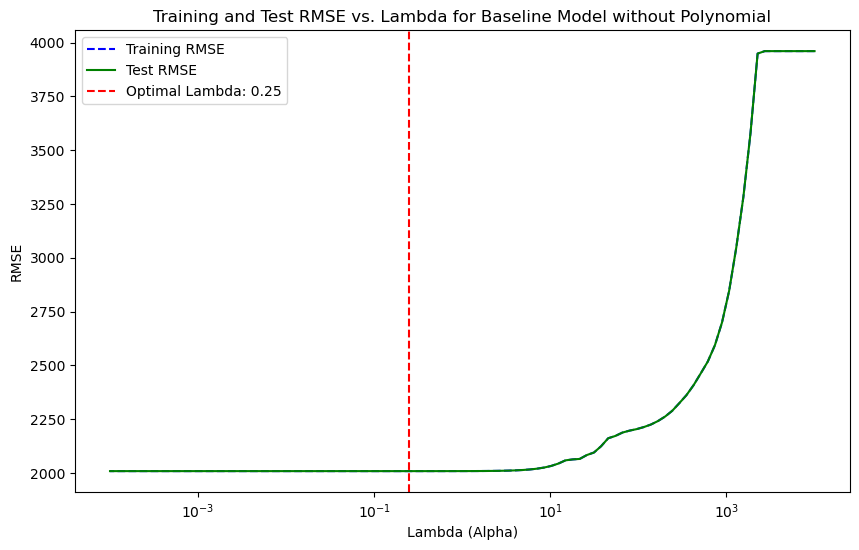

In [3]:
# Subdata preparation
X_sub = Data.drop(['Monthly rent', 'Longitude', 'Latitude', 'PostalCode_1000-1999', 'Floor_-1 to 0', 
                   'Distance to Transport Station (km)', 'Distance to Beach (km)', 'Distance to School (km)', 
                   'Distance to Restaurant (km)', 'Distance to Hospital (km)', 'Distance to Mall (km)'], axis=1)
y_sub = Data['Monthly rent']

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.3, random_state=42)

# Scaling the subdata
scaler_sub = StandardScaler().fit(X_train_sub)
X_train_sub_scaled = scaler_sub.transform(X_train_sub)
X_test_sub_scaled = scaler_sub.transform(X_test_sub)

# Manually specify a broader range of alphas
alphas_to_test = np.logspace(-4, 4, 100)

# LASSO with cross-validation on subdata
lasso_cv_sub = LassoCV(alphas=alphas_to_test, cv=10, max_iter=10000)
lasso_cv_sub.fit(X_train_sub_scaled, y_train_sub)

# Predictions
y_pred_train_sub = lasso_cv_sub.predict(X_train_sub_scaled)
y_pred_test_sub = lasso_cv_sub.predict(X_test_sub_scaled)

# RMSE
rmse_train_sub = np.sqrt(mean_squared_error(y_train_sub, y_pred_train_sub))
rmse_test_sub = np.sqrt(mean_squared_error(y_test_sub, y_pred_test_sub))

print(f"Subdata: Best alpha = {lasso_cv_sub.alpha_}")
print(f"Subdata: Training RMSE = {rmse_train_sub}")
print(f"Subdata: Test RMSE = {rmse_test_sub}")

# Calculate training RMSE for each alpha
train_mse = np.mean(lasso_cv_sub.mse_path_, axis=1)
train_rmse = np.sqrt(train_mse)

# Calculate test RMSE for each alpha
test_rmse = np.sqrt(lasso_cv_sub.mse_path_.mean(axis=-1))

# Plotting RMSE vs. Lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_sub.alphas_, train_rmse, label='Training RMSE', color='blue', linestyle='--')
plt.plot(lasso_cv_sub.alphas_, test_rmse, label='Test RMSE', color='green')
plt.axvline(lasso_cv_sub.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {lasso_cv_sub.alpha_:.2f}')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE vs. Lambda for Baseline Model without Polynomial')
plt.savefig("RMSE_vs_Lambda_Baseline_Without.png")
plt.legend()
plt.show()

# 2.2: Baseline model with polynomials

Subdata with Polynomial Features: Best alpha = 14.849682622544666
Subdata with Polynomial Features: Training RMSE = 1682.34442095562
Subdata with Polynomial Features: Test RMSE = 1754.6710912677431


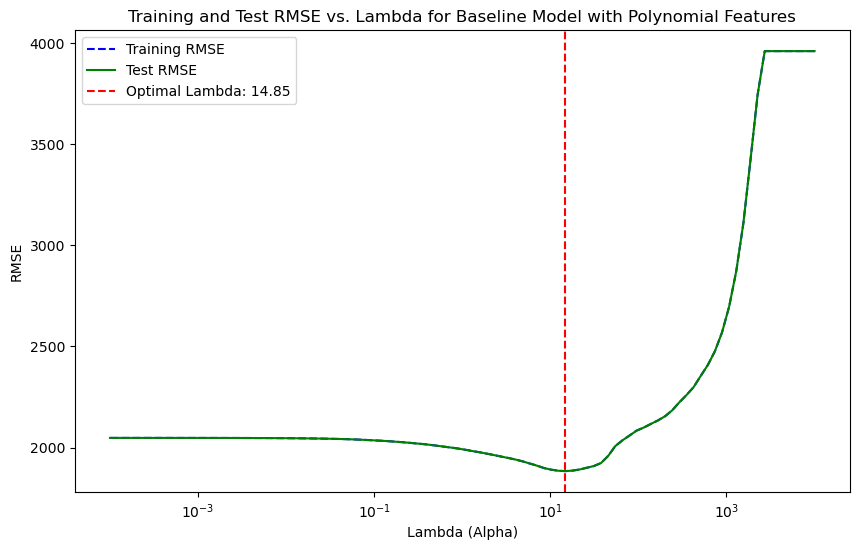

In [4]:
# Subdata preparation
X_sub = Data.drop(['Monthly rent', 'Longitude', 'Latitude', 'PostalCode_1000-1999', 'Floor_-1 to 0', 
                   'Distance to Transport Station (km)', 'Distance to Beach (km)', 'Distance to School (km)', 
                   'Distance to Restaurant (km)', 'Distance to Hospital (km)', 'Distance to Mall (km)'], axis=1)
y_sub = Data['Monthly rent']

# Generating polynomial features for subdata
poly_sub = PolynomialFeatures(degree=2, include_bias=False)
X_sub_poly = poly_sub.fit_transform(X_sub)

X_train_sub_poly, X_test_sub_poly, y_train_sub, y_test_sub = train_test_split(X_sub_poly, y_sub, test_size=0.3, random_state=42)

# Scaling the subdata
scaler_sub_poly = StandardScaler().fit(X_train_sub_poly)
X_train_sub_poly_scaled = scaler_sub_poly.transform(X_train_sub_poly)
X_test_sub_poly_scaled = scaler_sub_poly.transform(X_test_sub_poly)

# Manually specify a broader range of alphas
alphas_to_test = np.logspace(-4, 4, 100)

# LASSO with cross-validation on subdata
lasso_cv_sub_poly = LassoCV(alphas=alphas_to_test, cv=10, max_iter=10000)
lasso_cv_sub_poly.fit(X_train_sub_poly_scaled, y_train_sub)

# Predictions
y_pred_train_sub_poly = lasso_cv_sub_poly.predict(X_train_sub_poly_scaled)
y_pred_test_sub_poly = lasso_cv_sub_poly.predict(X_test_sub_poly_scaled)

# RMSE
rmse_train_sub_poly = np.sqrt(mean_squared_error(y_train_sub, y_pred_train_sub_poly))
rmse_test_sub_poly = np.sqrt(mean_squared_error(y_test_sub, y_pred_test_sub_poly))

print(f"Subdata with Polynomial Features: Best alpha = {lasso_cv_sub_poly.alpha_}")
print(f"Subdata with Polynomial Features: Training RMSE = {rmse_train_sub_poly}")
print(f"Subdata with Polynomial Features: Test RMSE = {rmse_test_sub_poly}")

# Calculate training RMSE for each alpha
train_mse_poly = np.mean(lasso_cv_sub_poly.mse_path_, axis=1)
train_rmse_poly = np.sqrt(train_mse_poly)

# Calculate test RMSE for each alpha
test_rmse_poly = np.sqrt(lasso_cv_sub_poly.mse_path_.mean(axis=-1))

# Plotting RMSE vs. Lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_sub_poly.alphas_, train_rmse_poly, label='Training RMSE', color='blue', linestyle='--')
plt.plot(lasso_cv_sub_poly.alphas_, test_rmse_poly, label='Test RMSE', color='green')
plt.axvline(lasso_cv_sub_poly.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {lasso_cv_sub_poly.alpha_:.2f}')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE vs. Lambda for Baseline Model with Polynomial Features')
plt.legend()
plt.savefig("RMSE_vs_Lambda_Subdata_Poly.png")
plt.show()

# 2.3 Extended model without polynomials

Full Data: Best alpha = 0.24770763559917114
Full Data: Training RMSE = 1883.2498802527114
Full Data: Test RMSE = 1866.9201210561398


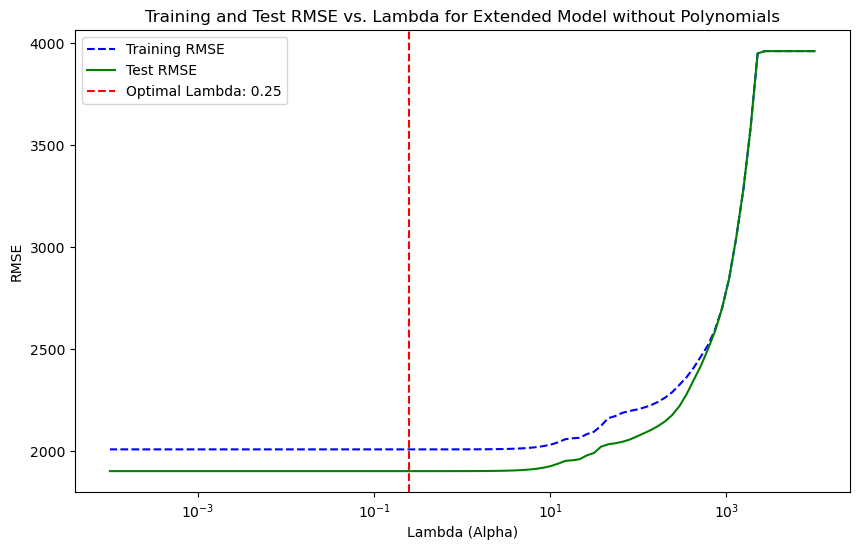

In [5]:

# Splitting the data
X_full = Data.drop(['Monthly rent', 'Longitude', 'Latitude', 'PostalCode_1000-1999', 'Floor_-1 to 0'], axis=1)
y_full = Data['Monthly rent']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

# Scaling the data
scaler_full = StandardScaler().fit(X_train_full)
X_train_full_scaled = scaler_full.transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

# Manually specify a broader range of alphas
alphas_to_test = np.logspace(-4, 4, 100)

# LASSO with cross-validation
lasso_cv_full = LassoCV(alphas=alphas_to_test, cv=10, max_iter=10000)
lasso_cv_full.fit(X_train_full_scaled, y_train_full)

# Predictions
y_pred_train_full = lasso_cv_full.predict(X_train_full_scaled)
y_pred_test_full = lasso_cv_full.predict(X_test_full_scaled)

# RMSE
rmse_train_full = np.sqrt(mean_squared_error(y_train_full, y_pred_train_full))
rmse_test_full = np.sqrt(mean_squared_error(y_test_full, y_pred_test_full))

print(f"Full Data: Best alpha = {lasso_cv_full.alpha_}")
print(f"Full Data: Training RMSE = {rmse_train_full}")
print(f"Full Data: Test RMSE = {rmse_test_full}")

# Calculate training RMSE for each alpha
train_mse_full = np.mean(lasso_cv_full.mse_path_, axis=1)
train_rmse_full = np.sqrt(train_mse)

# Calculate test RMSE for each alpha
test_rmse_full = np.sqrt(lasso_cv_full.mse_path_.mean(axis=-1))

# Plotting RMSE vs. Lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_full.alphas_, train_rmse_full, label='Training RMSE', color='blue', linestyle='--')
plt.plot(lasso_cv_full.alphas_, test_rmse_full, label='Test RMSE', color='green')
plt.axvline(lasso_cv_full.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {lasso_cv_full.alpha_:.2f}')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE vs. Lambda for Extended Model without Polynomials')
plt.legend()
plt.savefig("RMSE_vs_Lambda_FullData.png")
plt.show()


# 2.4: Extended model with polynomials

Full Data with Polynomial Features: Best alpha = 8.497534359086455
Full Data with Polynomial Features: Training RMSE = 1374.2014255230747
Full Data with Polynomial Features: Test RMSE = 1512.1810241184587


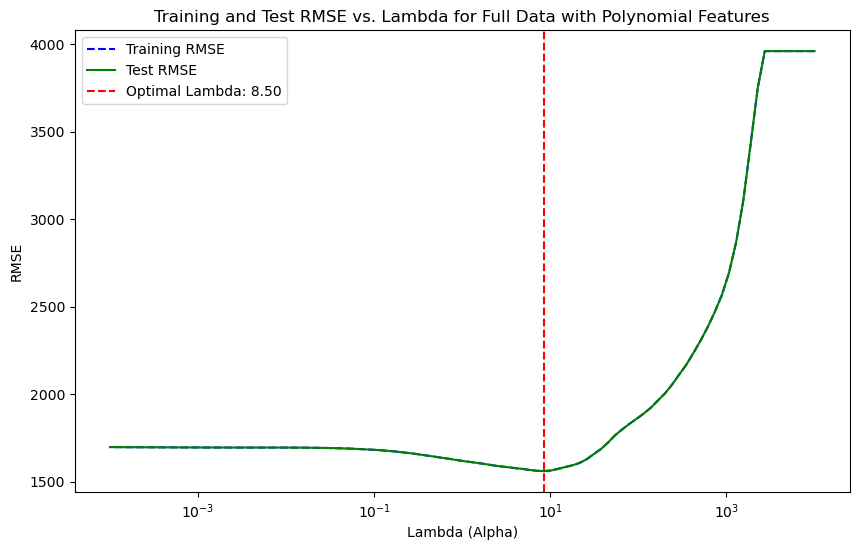

In [6]:
# Splitting the data
X_full = Data.drop(['Monthly rent', 'Longitude', 'Latitude', 'PostalCode_1000-1999', 'Floor_-1 to 0'], axis=1)
y_full = Data['Monthly rent']

# Generating polynomial features
poly_full = PolynomialFeatures(degree=2, include_bias=False)
X_full_poly = poly_full.fit_transform(X_full)

X_train_full_poly, X_test_full_poly, y_train_full_poly, y_test_full_poly = train_test_split(X_full_poly, y_full, test_size=0.3, random_state=42)

# Scaling the data
scaler_full_poly = StandardScaler().fit(X_train_full_poly)
X_train_full_poly_scaled = scaler_full_poly.transform(X_train_full_poly)
X_test_full_poly_scaled = scaler_full_poly.transform(X_test_full_poly)

# Manually specify a broader range of alphas
alphas_to_test = np.logspace(-4, 4, 100)

# LASSO with cross-validation
lasso_cv_full_poly = LassoCV(alphas=alphas_to_test, cv=10, max_iter=10000)
lasso_cv_full_poly.fit(X_train_full_poly_scaled, y_train_full_poly)

# Predictions
y_pred_train_full_poly = lasso_cv_full_poly.predict(X_train_full_poly_scaled)
y_pred_test_full_poly = lasso_cv_full_poly.predict(X_test_full_poly_scaled)

# RMSE
rmse_train_full_poly = np.sqrt(mean_squared_error(y_train_full_poly, y_pred_train_full_poly))
rmse_test_full_poly = np.sqrt(mean_squared_error(y_test_full_poly, y_pred_test_full_poly))

print(f"Full Data with Polynomial Features: Best alpha = {lasso_cv_full_poly.alpha_}")
print(f"Full Data with Polynomial Features: Training RMSE = {rmse_train_full_poly}")
print(f"Full Data with Polynomial Features: Test RMSE = {rmse_test_full_poly}")

# Calculate training RMSE for each alpha
train_mse_full_poly = np.mean(lasso_cv_full_poly.mse_path_, axis=1)
train_rmse_full_poly = np.sqrt(train_mse_full_poly)

# Calculate test RMSE for each alpha
test_rmse_full_poly = np.sqrt(lasso_cv_full_poly.mse_path_.mean(axis=-1))

# Plotting RMSE vs. Lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_full_poly.alphas_, train_rmse_full_poly, label='Training RMSE', color='blue', linestyle='--')
plt.plot(lasso_cv_full_poly.alphas_, test_rmse_full_poly, label='Test RMSE', color='green')
plt.axvline(lasso_cv_full_poly.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {lasso_cv_full_poly.alpha_:.2f}')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE vs. Lambda for Full Data with Polynomial Features')
plt.legend()
plt.savefig("RMSE_vs_Lambda_Extended_med_Polynomials.png")
plt.show()


# Run the below code, to get an overview of all features and corresponding coefficient in extended model with polynomials

In [1]:
# Get feature names from the polynomial features
feature_names = poly_full.get_feature_names(input_features=X_full.columns)

# Pair the feature names with their coefficients
coefficients = lasso_cv_full_poly.coef_
feature_coefficient_pairs = list(zip(feature_names, coefficients))

# Sort the feature_coefficient_pairs based on the absolute value of the coefficients
sorted_feature_coefficient_pairs = sorted(feature_coefficient_pairs, key=lambda x: abs(x[1]), reverse=True)

# Display the sorted feature names along with their coefficients
for feature, coef in sorted_feature_coefficient_pairs:
    print(f"{feature}: {coef}")

# Threshold for considering a coefficient as approximately zero
threshold = 1e-5

# Count the number of coefficients that are approximately zero
approx_zero_coef_count = sum(1 for _, coef in sorted_feature_coefficient_pairs if abs(coef) < threshold)

# Calculate the percentage of coefficients that are approximately zero
approx_zero_coef_pct = (approx_zero_coef_count / len(sorted_feature_coefficient_pairs)) * 100

print(f"Percentage of coefficients approximately zero: {approx_zero_coef_pct:.2f}%")
print(f"Number of coefficients approximately zero: {approx_zero_coef_count}")

NameError: name 'poly_full' is not defined

Combine

In [12]:
pip install numpy scikit-learn pandas


Note: you may need to restart the kernel to use updated packages.


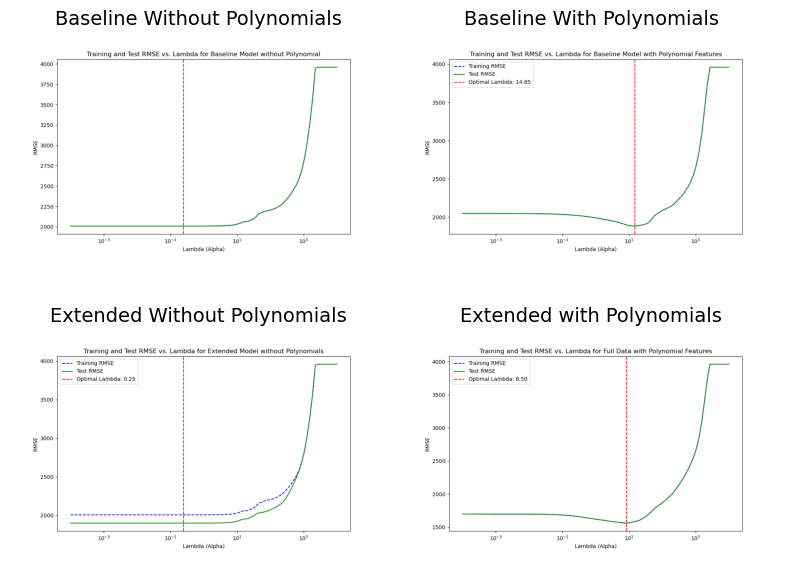

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img1 = mpimg.imread("RMSE_vs_Lambda_Baseline_Without.png")
img2 = mpimg.imread("RMSE_vs_Lambda_Subdata_Poly.png")
img3 = mpimg.imread("RMSE_vs_Lambda_FullData.png")
img4 = mpimg.imread("RMSE_vs_Lambda_Extended_med_Polynomials.png")

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Adjust space between plots
fig.subplots_adjust(hspace=0, wspace=2)

# Display the images
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
axs[0, 0].set_title("Baseline Without Polynomials", fontsize=14)

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')
axs[0, 1].set_title("Baseline With Polynomials", fontsize=14)

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')
axs[1, 0].set_title("Extended Without Polynomials", fontsize=14)

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')
axs[1, 1].set_title("Extended with Polynomials", fontsize=14)

# Save the combined figure
plt.tight_layout()
plt.savefig("Refined_Combined_RMSE_vs_Lambda.png", bbox_inches='tight', pad_inches=0.1)
plt.show()



Goes Down: Initially, as you increase the strength of regularization (i.e., increase lambda), the model becomes less overfit to the training data, and thus the test error might reduce.
Goes Up: After a certain point, increasing lambda results in too much regularization. This causes the model to become underfit, meaning it's too simple to capture the underlying patterns in the data. As a result, both training and test error can start to increase.
Becomes Stable: At very high lambda values, most of the coefficients in the Lasso regression approach zero. Therefore, further increases in lambda have minimal impact on the model's predictions, resulting in a relatively stable error.
Blue Line (Train RMSE):

Goes Up: As lambda increases, the model becomes more regularized and thus more biased. This results in an increase in the training error.
Becomes Stable: Similar to the test RMSE, at high lambda values, the model becomes very simple, and further increases in lambda have minimal effect.
When interpreting this:

The lambda that minimizes the test RMSE is the optimal value as it strikes a balance between bias and variance.
If the training RMSE is significantly lower than the test RMSE across most lambda values, it indicates that the model might be overfitting the training data.
The stable pattern after a certain point simply indicates that the model has become too simple to learn any more from the data.